# Medical Insurance Project

First, let's import, then inspect the data. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('insurance.csv')

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Next, let's analyze some general statistics. 

# General Statistics

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


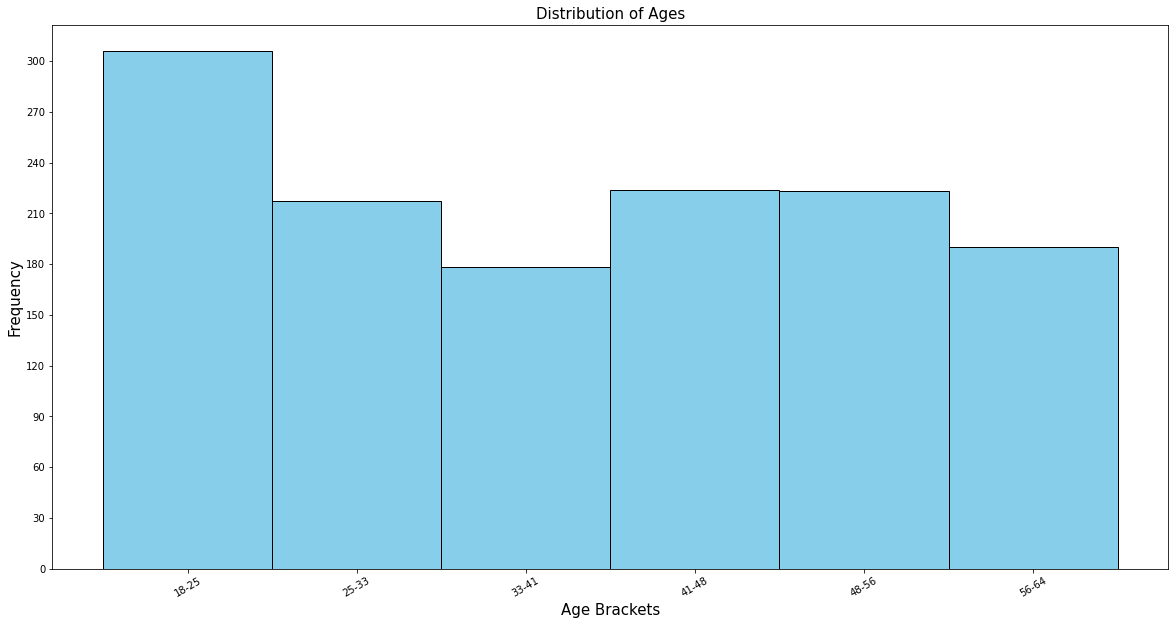

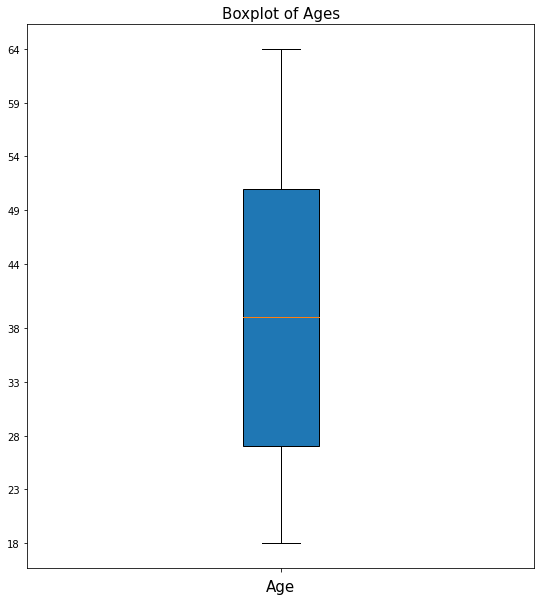

<Figure size 1440x720 with 0 Axes>

In [54]:
print(df['age'].describe())

ax1=plt.subplot()

plt.rcParams['figure.figsize']=(20,10)
plt.hist(df['age'],histtype='bar',color='skyblue',bins=6,edgecolor='black')
plt.xlabel('Age Brackets',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Ages',fontsize=15)

m=df.age.min()
M=df.age.max()
X=np.arange(m,M,(M-m)/6)
mid=[]
L=[]

for i in range(len(X)-1):
    mid.append((X[i]+X[i+1])/2)
mid.append((X[-1]+M)/2)

for i in range(len(X)-1):
    L.append(str(int(X[i]))+'-'+str(int(X[i+1])))
L.append(str(int(X[-1]))+'-'+str(int(M)))

ax1.set_xticks(mid)
ax1.set_xticklabels(L)
plt.xticks(rotation=30)

Y=np.arange(0,330,300/10)
ax1.set_yticks(Y)

plt.show()
plt.clf()


plt.rcParams['figure.figsize']=(20,10)
ax2=plt.subplot(1,2,2)
YY=np.linspace(m,M,10)
YY=[np.round(y) for y in YY]
plt.boxplot(df['age'], patch_artist=True)
plt.xlabel('Age',fontsize=15)
ax2.set_yticks(YY)
ax2.set_xticklabels('')
plt.title('Boxplot of Ages',fontsize=15)
plt.show()
plt.clf()

Now, let's see how the genders are distributed.

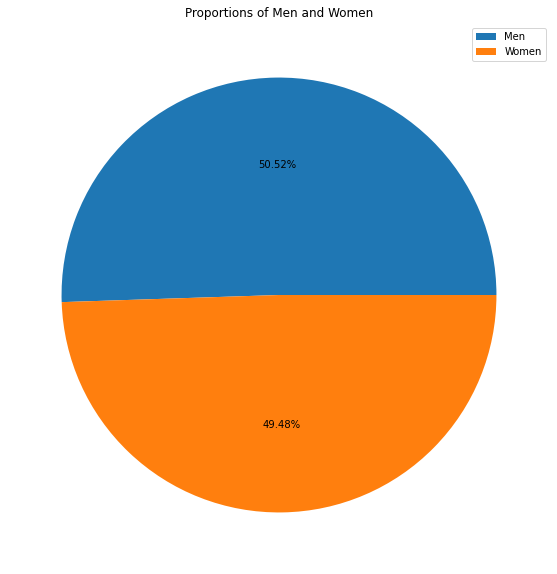

In [4]:
props_gender=df['sex'].value_counts()/len(df)
plt.pie(props_gender,autopct="%.2f%%")
plt.legend(['Men','Women'])
plt.title('Proportions of Men and Women')
plt.axis()
plt.rcParams['figure.figsize']=(20,10)
plt.show()

From the pie chart above, we see that our sample population is roughly half men and half women. Similarly, we can do a similar analysis for the proportions of smokers and non-smokers.

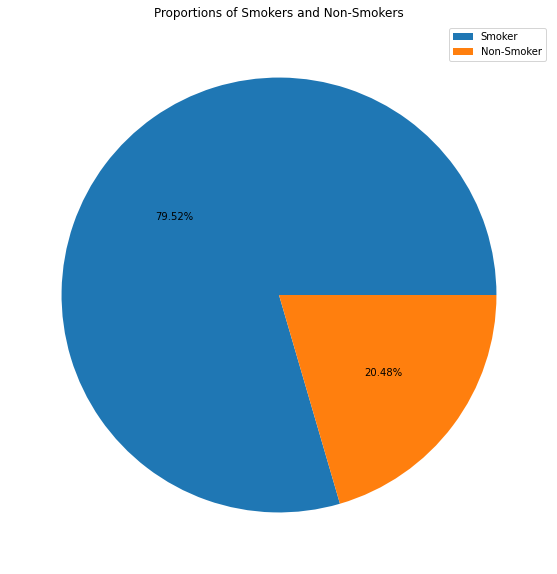

In [5]:
props_smokers=df['smoker'].value_counts()/len(df)
plt.pie(props_smokers,autopct="%.2f%%")
plt.legend(['Smoker','Non-Smoker'])
plt.title('Proportions of Smokers and Non-Smokers')
plt.axis()
plt.rcParams['figure.figsize']=(20,10)
plt.show()

From this, we see that most of our sample, almost 80 percent, are smokers. But what about their BMI's? 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


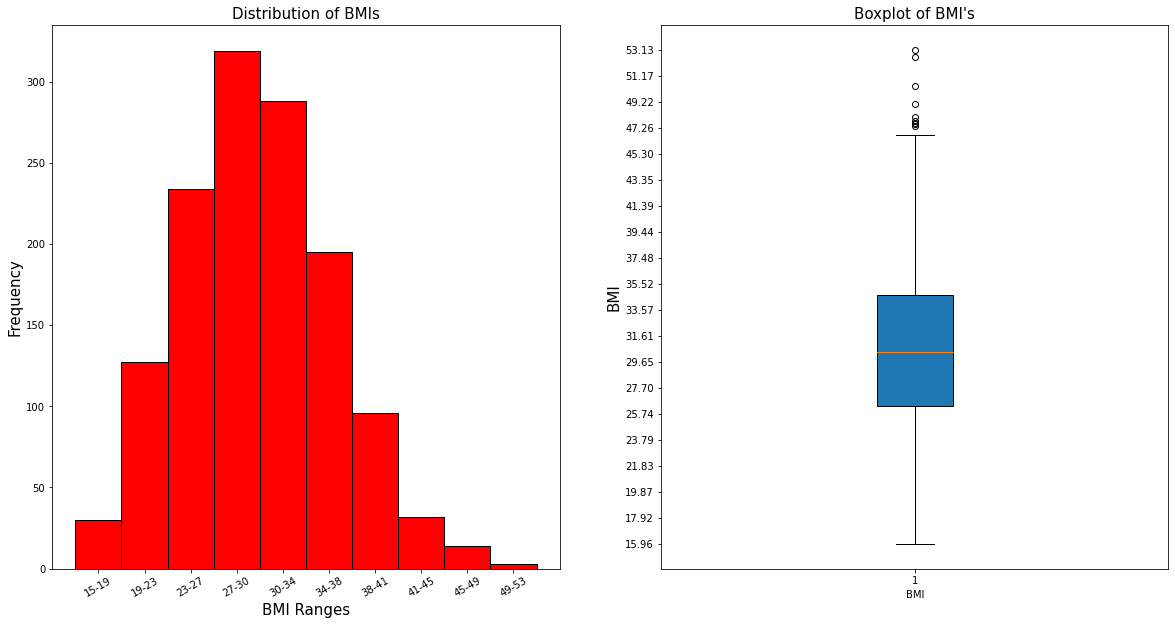

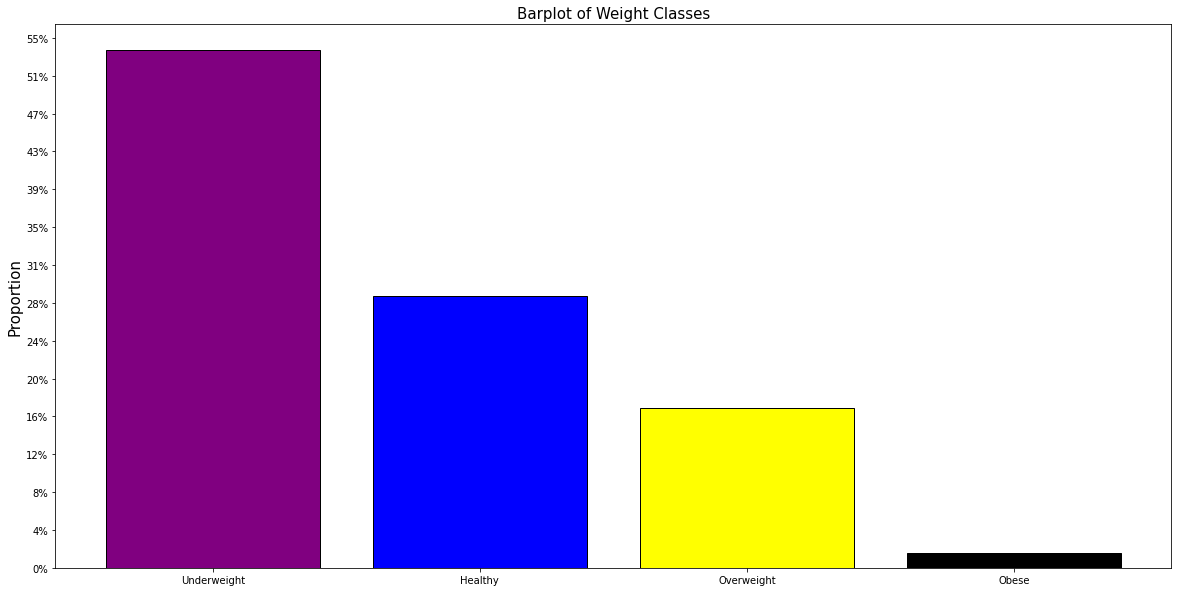

In [6]:
print(df['bmi'].describe())
ax1=plt.subplot(1,2,1)
plt.hist(df['bmi'],histtype='bar',color='red',edgecolor='black')
plt.title('Distribution of BMIs',fontsize=15)
plt.xlabel('BMI Ranges',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

m=df.bmi.min()
M=df.bmi.max()
X=np.arange(m,M,(M-m)/10)
mid=[]
L=[]

for i in range(len(X)-1):
    mid.append((X[i]+X[i+1])/2)
mid.append((X[-1]+M)/2)

for i in range(len(X)-1):
    L.append(str(int(X[i]))+'-'+str(int(X[i+1])))
L.append(str(int(X[-1]))+'-'+str(int(M)))

ax1.set_xticks(mid)
ax1.set_xticklabels(L)
plt.xticks(rotation=30)


ax2=plt.subplot(1,2,2)
plt.boxplot(df['bmi'],patch_artist=True)
plt.title("Boxplot of BMI's",fontsize=15)
plt.xlabel("BMI")
plt.ylabel('BMI',fontsize=15)

Y=np.linspace(m,M,20)
ax2.set_yticks(Y)

plt.show()
plt.clf()

fig=plt.subplot()
def weight_class(bmi):
    if bmi<18.5:
        return 'underweight'
    elif (bmi>=18.5) & (bmi<=24.9):
        return 'healthy'
    elif (bmi>=25) & (bmi<=29.9):
        return 'overweight'
    else:
        return 'obese'
    
df['weight_class']=df.bmi.apply(weight_class)

props_weight = df['weight_class'].value_counts()/len(df)

plt.bar(['Underweight','Healthy','Overweight','Obese'],props_weight,color=['Purple','Blue','Yellow','Black'],edgecolor='black')
plt.title('Barplot of Weight Classes',fontsize=15)
plt.ylabel('Proportion', fontsize=15)

YY=np.linspace(0.0,0.55,15)
fig.set_yticks(YY)

L=[]
for y in YY:
    l=round(100*y)
    L.append(str(l)+'%')

fig.set_yticklabels(L)

plt.show()

Now, that we've analyzed the BMI in a general sense, let's move on to the 'children' column.

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


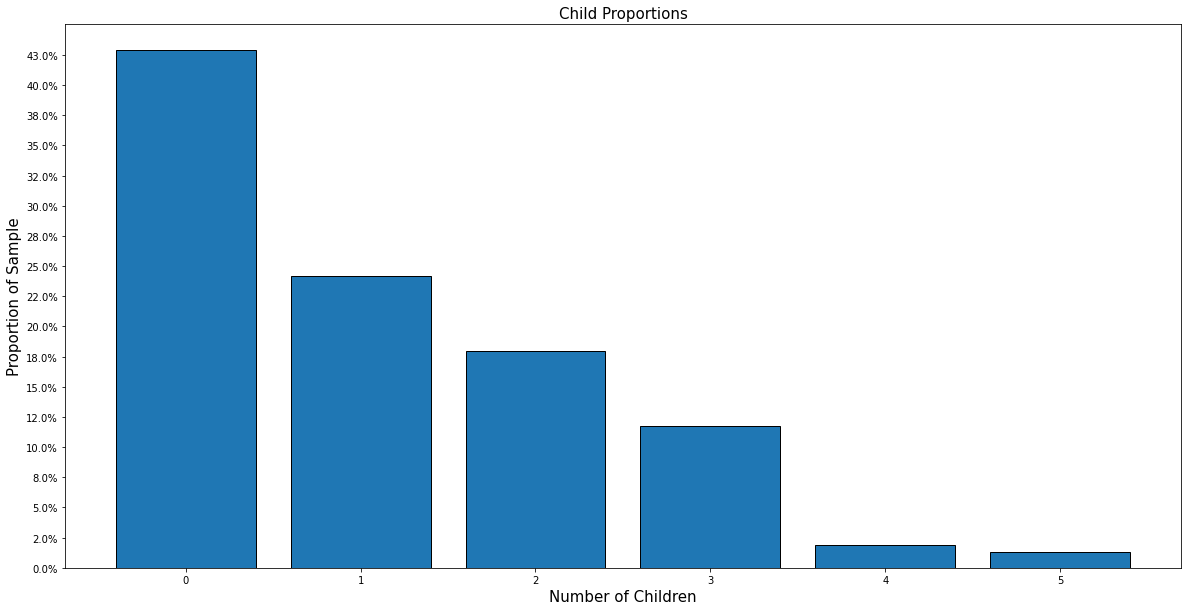

<Figure size 1440x720 with 0 Axes>

In [26]:
print(df['children'].describe())
print(df['children'].value_counts())

ax=plt.subplot()
plt.bar([0,1,2,3,4,5],df['children'].value_counts()/len(df),edgecolor='black')
plt.xlabel('Number of Children',fontsize=15)
plt.ylabel('Proportion of Sample',fontsize=15)
plt.title('Child Proportions',fontsize=15)

ticks=np.arange(0,0.45,0.025)
labels=[]

for tick in ticks:
    labels.append(str(np.round(tick*100))+'%')
    
ax.set_yticks(ticks)
ax.set_yticklabels(labels)
    

plt.show()
plt.clf()


Now that we've analyzed the children column, in a broad sense, let's move on to the region column. 

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


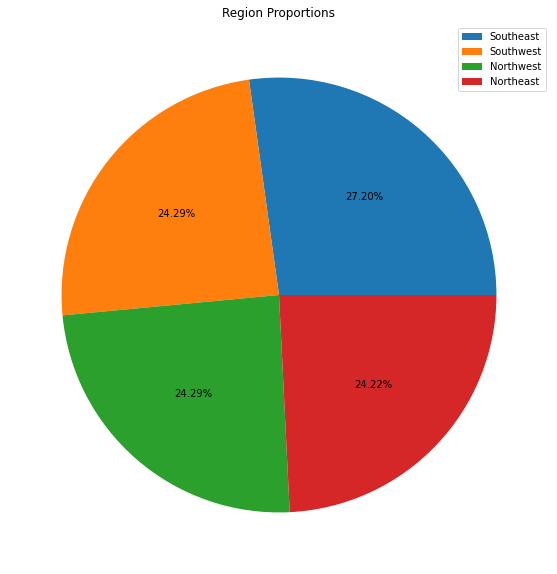

In [31]:
print(df['region'].value_counts()/len(df))

plt.pie(df['region'].value_counts()/len(df),autopct='%0.2f%%',normalize=False)
plt.legend(['Southeast','Southwest','Northwest','Northeast'])
plt.title('Region Proportions')
plt.show()

From the pie chart above, we see that our population was sampled roughly equally across all four regions. Now that we've discovered this, let's move on to the final column, 'charges'.

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


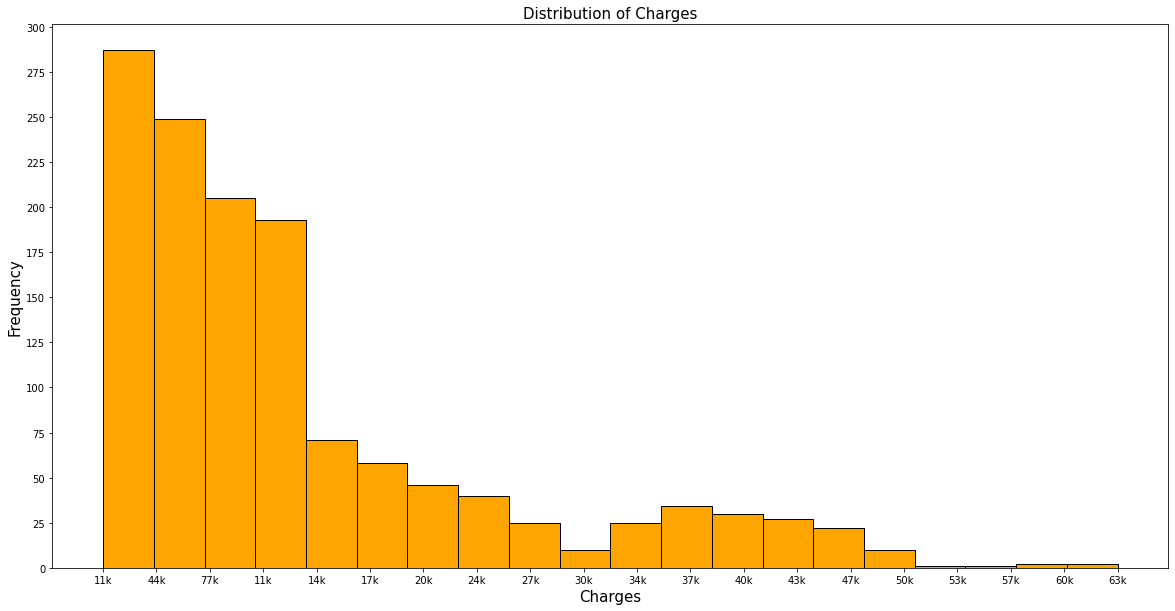

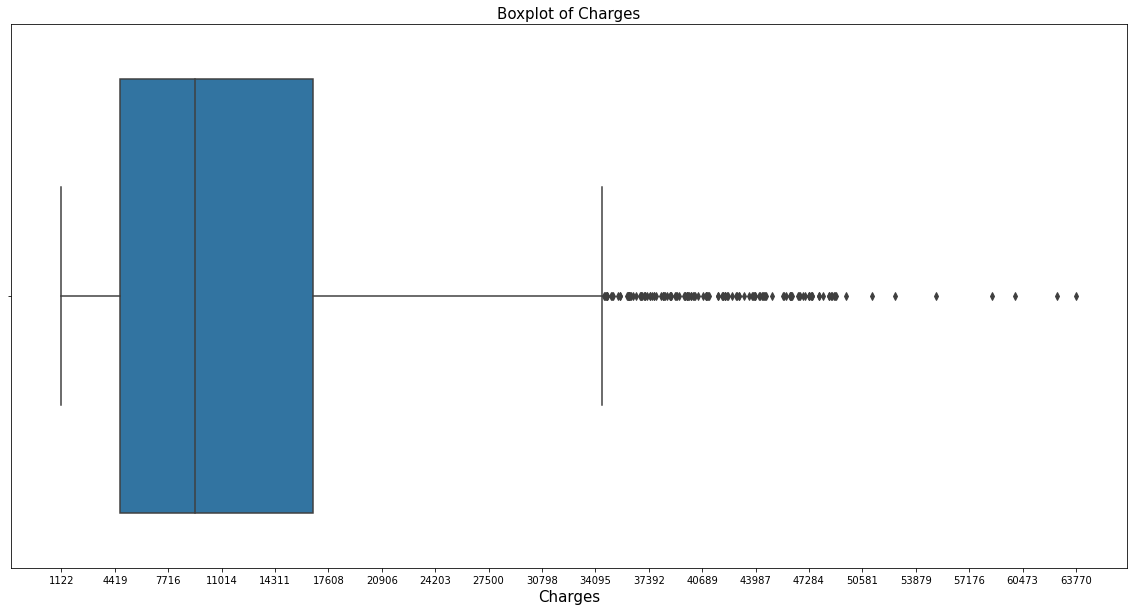

In [48]:
print(df['charges'].describe())

m=df['charges'].min()
M=df['charges'].max()

ax=plt.subplot()
plt.hist(df['charges'],histtype='bar',edgecolor='black',color='orange', bins=20)
plt.xlabel('Charges',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Charges',fontsize=15)
ax.set_yticks(np.arange(0,325,25))
ticks=np.linspace(m,M,20)
labels=[]

for tick in ticks:
    l=str(tick)
    l=l[:2]+'k'
    labels.append(l)

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.show()
plt.clf()

ax2=plt.subplot()
sns.boxplot(data=df,x='charges')
ticks=[np.round(x,2) for x in np.linspace(m,M,20)]
ax2.set_xticks(ticks)
plt.title('Boxplot of Charges',fontsize=15)
plt.xlabel('Charges',fontsize=15)
plt.show()

From the boxplot above and histogram above, we see that the charges have a very right skew distribution, with a median much less than the mean. 

# Men v.s Women

Now, let's begin to analyze the data, grouped by gender.

In [57]:
men=df[df['sex']=='male']
women=df[df['sex']=='female']

print(men.describe())
print(women.describe())

              age         bmi    children       charges
count  676.000000  676.000000  676.000000    676.000000
mean    38.917160   30.943129    1.115385  13956.751178
std     14.050141    6.140435    1.218986  12971.025915
min     18.000000   15.960000    0.000000   1121.873900
25%     26.000000   26.410000    0.000000   4619.134000
50%     39.000000   30.687500    1.000000   9369.615750
75%     51.000000   34.992500    2.000000  18989.590250
max     64.000000   53.130000    5.000000  62592.873090
              age         bmi    children       charges
count  662.000000  662.000000  662.000000    662.000000
mean    39.503021   30.377749    1.074018  12569.578844
std     14.054223    6.046023    1.192115  11128.703801
min     18.000000   16.815000    0.000000   1607.510100
25%     27.000000   26.125000    0.000000   4885.158700
50%     40.000000   30.107500    1.000000   9412.962500
75%     51.750000   34.313750    2.000000  14454.691825
max     64.000000   48.070000    5.000000  63770

Grouped by sex, the general statistics for each column are negligably different, except charges. Is the mean charge for men higher than the mean charge for women? Or is this difference due to just random chance? Let's investigate further.

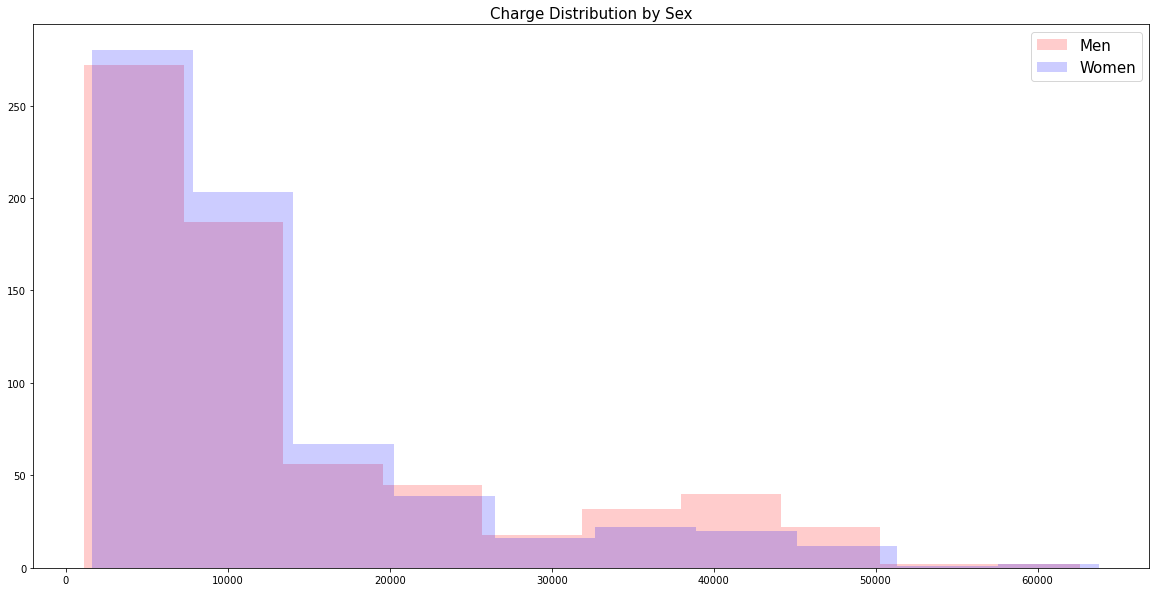

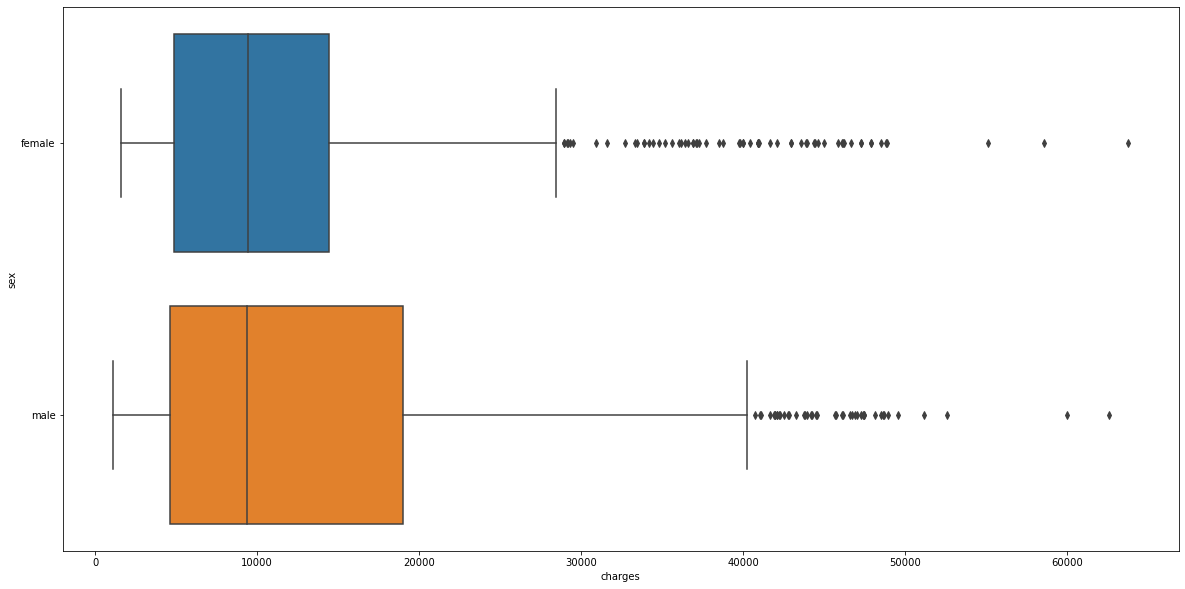

In [66]:
plt.hist(men.charges, histtype='bar', color='red',alpha=0.2)
plt.hist(women.charges, histtype='bar',color='blue',alpha=0.2)
plt.legend(['Men','Women'],prop={'size':15})
plt.title('Charge Distribution by Sex', fontsize=15)
plt.show()
plt.clf()

sns.boxplot(data=df,x='charges',y='sex')
plt.show()

In the boxplot above, it seems men have a larger IQR for charges. Does this mean anything signficant? Let's do a two-sample hypothesis test to see.

In [70]:
from scipy.stats import ttest_ind

print(ttest_ind(men.charges,women.charges))

Ttest_indResult(statistic=2.097546590051688, pvalue=0.03613272100592976)


From the result above, we obtained a p-value<0.05. Thus we can say with 95% confidence that the average charge for men is greater than the average charge for women. 